Data preview:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
Predicted values:  [50.72 52.35 77.79 25.64 67.39]
Actual values:  [53. 50. 80. 24. 64.]
Trained weights (W):  [ 7.04165409 17.62561172  0.26387717  0.93993895  0.45056244]
Trained 

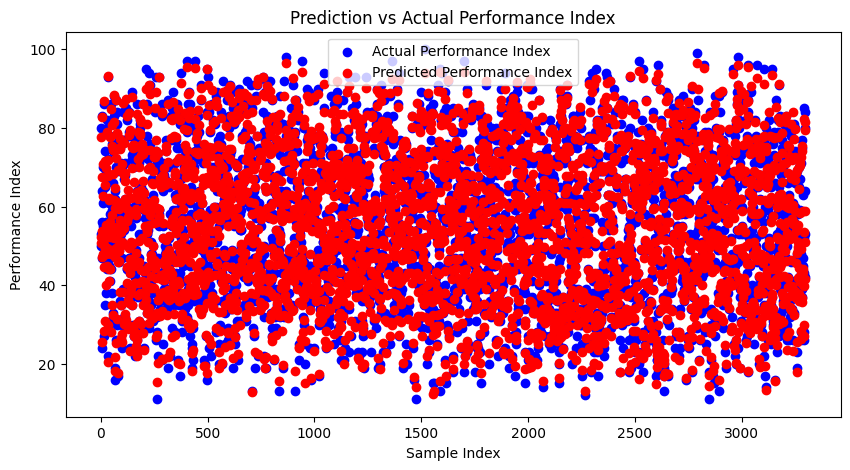

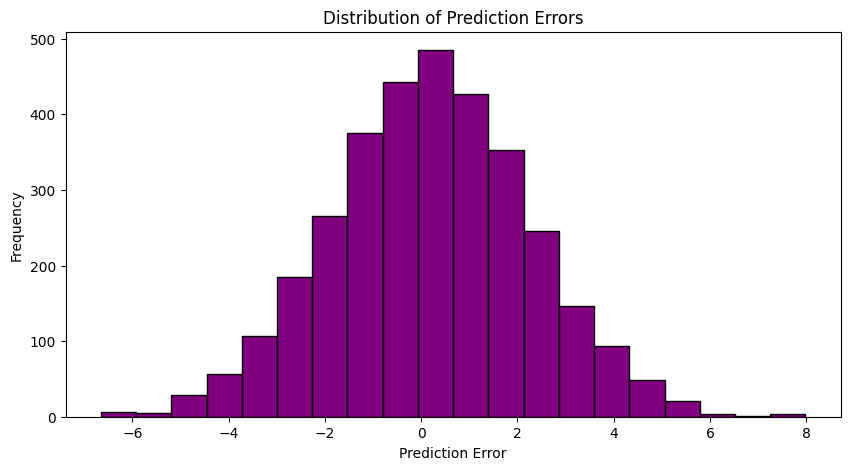

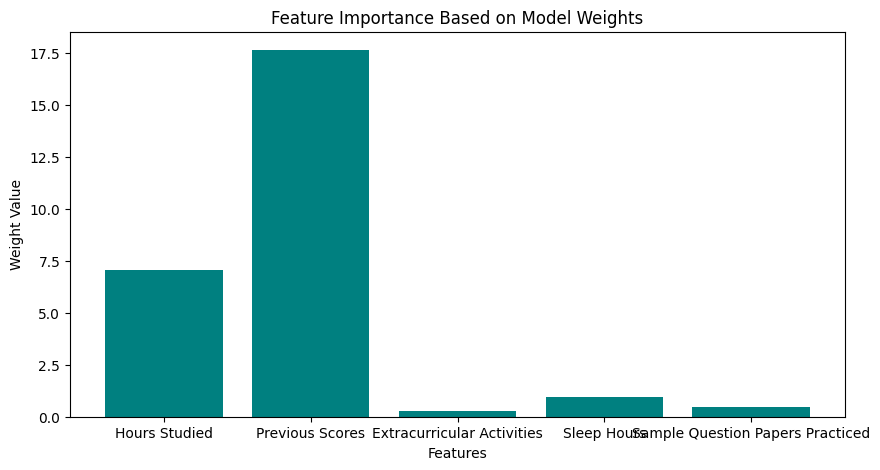

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = None
        self.b = None

    # Model training function with SGD
    def fit(self, X, Y):
        X = np.array(X, dtype=float)
        Y = np.array(Y, dtype=float)

        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0

        for i in range(self.iterations):
            for j in range(self.m):  # iterate over each sample
                self.update_weights(X[j], Y[j])

    # Helper function to update weights using SGD
    def update_weights(self, x, y):
        y_pred = self.predict(x)
        dW = -2 * (y - y_pred) * x  # Gradient for weights
        db = -2 * (y - y_pred)       # Gradient for bias

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

    # Prediction function
    def predict(self, X):
        X = np.array(X, dtype=float)
        return X.dot(self.W) + self.b

# Function to create plots
def plot_results(Y_test, Y_pred, model):
    # Prediction vs. Actual Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(Y_test)), Y_test, color="blue", label="Actual Performance Index")
    plt.scatter(range(len(Y_pred)), Y_pred, color="red", label="Predicted Performance Index")
    plt.title("Prediction vs Actual Performance Index")
    plt.xlabel("Sample Index")
    plt.ylabel("Performance Index")
    plt.legend()
    plt.show()

    # Error Distribution Plot
    errors = Y_test - Y_pred
    plt.figure(figsize=(10, 5))
    plt.hist(errors, bins=20, color="purple", edgecolor="black")
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Prediction Error")
    plt.ylabel("Frequency")
    plt.show()

    # Feature Importance Plot
    plt.figure(figsize=(10, 5))
    feature_names = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
    plt.bar(feature_names, model.W, color="teal")
    plt.title("Feature Importance Based on Model Weights")
    plt.xlabel("Features")
    plt.ylabel("Weight Value")
    plt.show()

# Load dataset and prepare features
def main():
    # Replace 'your_dataset.csv' with the path to your actual dataset
    df = pd.read_csv('/content/Student_Performance.csv')

    # Check the first few rows to understand the data structure
    print("Data preview:")
    print(df.head())

    # Encode categorical 'Extracurricular Activities' column
    le = LabelEncoder()
    df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

    # Split data into input features (X) and target variable (Y)
    X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']].values
    Y = df['Performance Index'].values

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split dataset into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

    # Initialize Linear Regression model with SGD
    model = LinearRegression(learning_rate=0.01, iterations=1000)

    # Train the model
    model.fit(X_train, Y_train)

    # Predictions on test set
    Y_pred = model.predict(X_test)

    # Print some results to compare predicted and actual values
    print("Predicted values: ", np.round(Y_pred[:5], 2))
    print("Actual values: ", Y_test[:5])
    print("Trained weights (W): ", model.W)
    print("Trained bias (b): ", model.b)

    # Plot results
    plot_results(Y_test, Y_pred, model)

if __name__ == "__main__":
    main()
